# Preparing the DataFrame 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv("./data/raw/IBM_Employees.csv")

In [ ]:
df2 = pd.read_csv("./data/raw/dados_covid_sp_20.csv")

## Exercise 1

**df1**

Plot a scatter plot with the variable *YearsAtCompany* on X axis and *DailyRate* on Y axis. Set the title as  "YearsAtCompany x DailyRate" e set the figure size to (10,5).

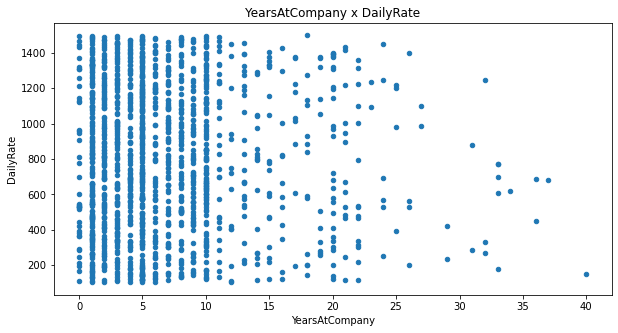

In [4]:
# Creating plot
df1.plot(
    x="YearsAtCompany",
    y="DailyRate",
    kind="scatter",
    figsize=(10, 5),
    title="YearsAtCompany x DailyRate",
)

# Showing plot
plt.show()

Plot the previous chart again, presenting the observations colors by gender (females in red color and males in green color). Set a legend for the plot.

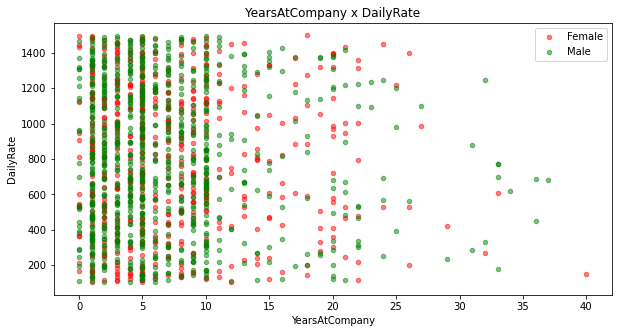

In [5]:
# Creating axis for female observations
ax1 = df1[df1["Gender"] == "Female"].plot(
    x="YearsAtCompany",
    y="DailyRate",
    kind="scatter",
    figsize=(10, 5),
    title="YearsAtCompany x DailyRate",
    color="red",
    alpha=0.5,
    label="Female",
)

# Creating axis for male observations
ax2 = df1[df1["Gender"] == "Male"].plot(
    x="YearsAtCompany",
    y="DailyRate",
    kind="scatter",
    ax=ax1,
    color="green",
    alpha=0.5,
    label="Male",
)

# Showing plot
plt.show()

Plot the previous chart again, identifying the employees by 'JobSatisfaction' variable, use the following colors:
- '#FFE4E1' for 1 - 'Low' 
- '#FFB6C1' for 2 - 'Medium' 
- '#FF69B4' for 3 - 'High' 
- '#C71585' for 4 - 'Very High' 

In [6]:
# Defining label and color info
label_and_color_info = {
    1: ["Low", "#FFE4E1"],
    2: ["Medium", "#FFB6C1"],
    3: ["High", "#FF69B4"],
    4: ["Very High", "#C71585"],
}

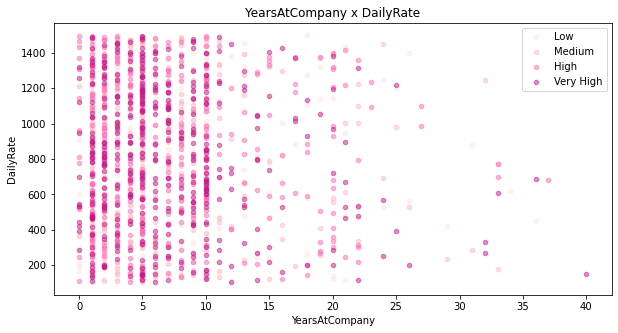

In [7]:
for value in label_and_color_info:
    if value == 1:
        ax = df1[df1["JobSatisfaction"] == value].plot(
            x="YearsAtCompany",
            y="DailyRate",
            kind="scatter",
            figsize=(10, 5),
            alpha=0.5,
            title="YearsAtCompany x DailyRate",
            color=label_and_color_info[value][1],
            label=label_and_color_info[value][0],
        )
    else:
        ax = df1[df1["JobSatisfaction"] == value].plot(
            x="YearsAtCompany",
            y="DailyRate",
            kind="scatter",
            figsize=(10, 5),
            alpha=0.5,
            title="YearsAtCompany x DailyRate",
            color=label_and_color_info[value][1],
            label=label_and_color_info[value][0],
            ax=ax,
        )

# Showing the plot
plt.show()

## Exercise 2

**Use df2**

Create a line plot showing the new cases progress per month for 'Grande São Paulo', 'São José do Rio Preto' e 'Marília' DRSs. Identify each DRS by color and legend. Set titles for the plot and labels.

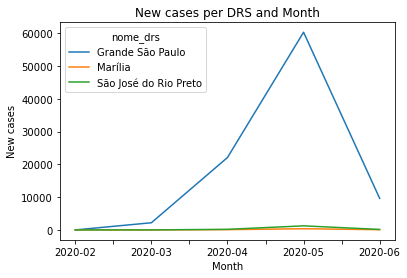

In [8]:
# Defining the filter
chosen_drs_group = ("Grande São Paulo", "São José do Rio Preto", "Marília")

# Creating a copy of df2, which will be used for plotting
df2_for_plotting = df2.copy()

# Categorizing date information
df2_for_plotting["ano_mes"] = pd.Categorical(
    values=df2_for_plotting["ano_mes"],
    categories=("2020-02", "2020-03", "2020-04", "2020-05", "2020-06"),
    ordered=True,
)

# Setting filter and grouping
df2_for_plotting = df2[df2["nome_drs"].isin(chosen_drs_group)]
df2_for_plotting = df2_for_plotting.groupby(
    ["ano_mes", "nome_drs"], as_index=False
).sum()

# Pivotting dataframe
df2_for_plotting = df2_for_plotting.pivot(
    index="ano_mes", columns="nome_drs", values="casos_novos"
)

# Creating plot
df2_for_plotting.plot(
    kind="line", title="New cases per DRS and Month", xlabel="Month", ylabel="New cases"
)

# Showing plot
plt.show()

Change the color for each DRS.

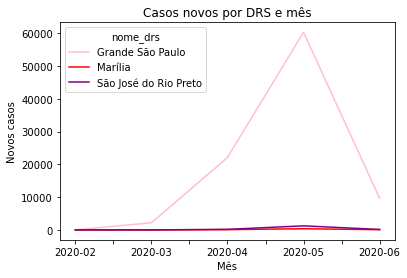

In [9]:
# Defining new colors
DRS_colors = {
    "Grande São Paulo": "pink",
    "São José do Rio Preto": "purple",
    "Marília": "red",
}

# Plotting
df2_for_plotting.plot(
    kind="line",
    title="New cases per DRS and Month",
    xlabel="Month",
    ylabel="New cases",
    color=DRS_colors,
)

# Showing plot
plt.show()

Considering only the DRSs 'Bauru', 'São José do Rio Preto' e 'Marília', create three pie plots for April, May, and June months showing the percentage of new deats for each DRS.

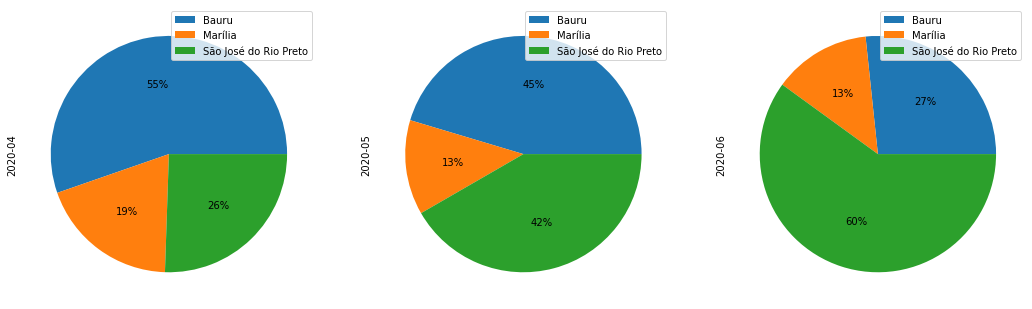

In [10]:
# Defining the filter
chosen_drs_group = ("Bauru", "São José do Rio Preto", "Marília")
chosen_months = ("2020-04", "2020-05", "2020-06")

# Creating a copy of df2, which will be used for plotting
df2_for_plotting = df2.copy()

# Categorizing date information
df2_for_plotting["ano_mes"] = pd.Categorical(
    values=df2_for_plotting["ano_mes"],
    categories=("2020-02", "2020-03", "2020-04", "2020-05", "2020-06"),
    ordered=True,
)

# Setting filter and grouping
df2_for_plotting = df2[
    (df2["nome_drs"].isin(chosen_drs_group)) & (df2["ano_mes"].isin(chosen_months))
]
df2_for_plotting = df2_for_plotting.groupby(
    ["ano_mes", "nome_drs"], as_index=False
).sum()

# Pivotting dataframe
df2_for_plotting = df2_for_plotting.pivot(
    index="nome_drs", columns="ano_mes", values="obitos_novos"
)

# Creating plot
df2_for_plotting.plot(
    kind="pie", subplots=True, figsize=(18, 6), autopct="%1.0f%%", labeldistance=None
)

# Showing plot
plt.show()

## Exercise 3:

**Use df2**

Create a bar plot presenting the total of deaths (considering every month) for all DRSs, excluding 'Grande São Paulo'. Set a title for the plot and axis labels, an appropriate figure size and intersperce the bars with red and green colors.

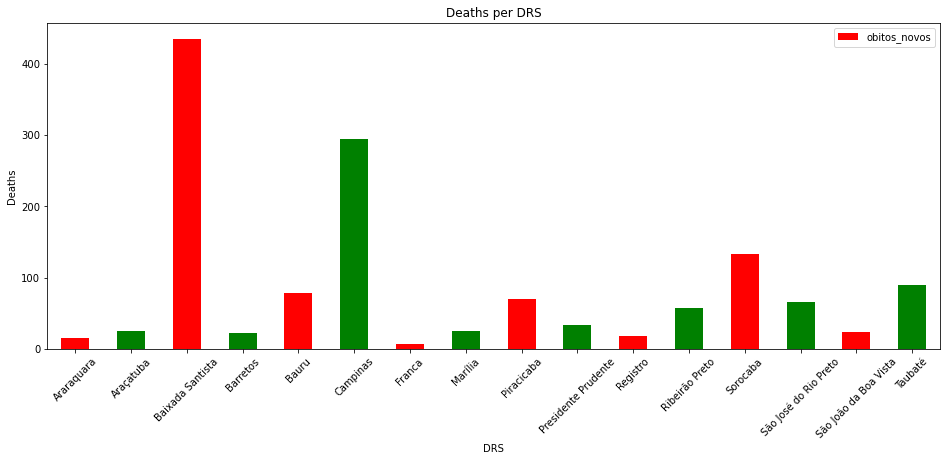

In [11]:
# Defining filter
filter_df2 = df2["nome_drs"] != "Grande São Paulo"

# Creating a copy of df2, which will be used for plotting
df2_for_plotting = df2.copy()

# Setting filter and grouping
df2_for_plotting = df2[filter_df2].groupby("nome_drs").sum()


# Creating plot
ax = df2_for_plotting.plot(
    y="obitos_novos",
    kind="bar",
    figsize=(16, 6),
    xlabel="DRS",
    ylabel="Deaths",
    title="Deaths per DRS",
    color=("red", "green"),
)

# Rotating xlabels
ax.tick_params(axis="x", labelrotation=45)

# Showing plot
plt.show()

Create a horizontal bar plot presenting the total deaths in April for 3 DRSs of your choice. Set a title for the figure and axis and an appropriate figure size.

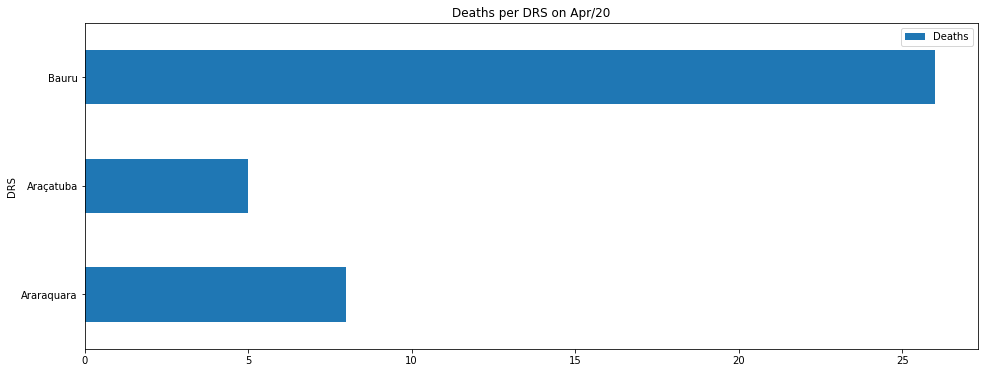

In [12]:
# Defining filters
drs_filter_df2 = df2["nome_drs"].isin(("Araraquara", "Araçatuba", "Bauru"))
month_filter_df2 = df2["ano_mes"] == "2020-04"

# Creating a copy of df2, which will be used for plotting
df2_for_plotting = df2.copy()

# Setting filter and grouping
df2_for_plotting = df2[drs_filter_df2 & month_filter_df2].groupby("nome_drs").sum()

# Creating plot
df2_for_plotting.plot(
    y="obitos_novos",
    kind="barh",
    figsize=(16, 6),
    xlabel="DRS",
    ylabel="Deaths",
    label="Deaths",
    title="Deaths per DRS on Apr/20",
)

# Showing plot
plt.show()

## Exercise 4

**Use df1**

Create a Histogram for employees age, dividing it by gender.

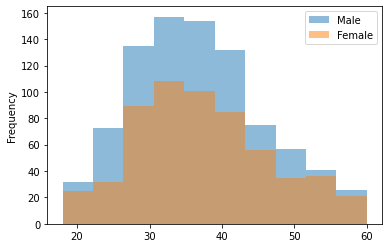

In [13]:
# Creating plot for male observations
ax1 = df1[df1["Gender"] == "Male"].plot(y="Age", kind="hist", label="Male", alpha=0.5)

# Creating plot for female observations
ax2 = df1[df1["Gender"] == "Female"].plot(
    y="Age", kind="hist", label="Female", alpha=0.5, ax=ax1
)

# Showing plot
plt.show()

Create a boxplot for employees age by gender.

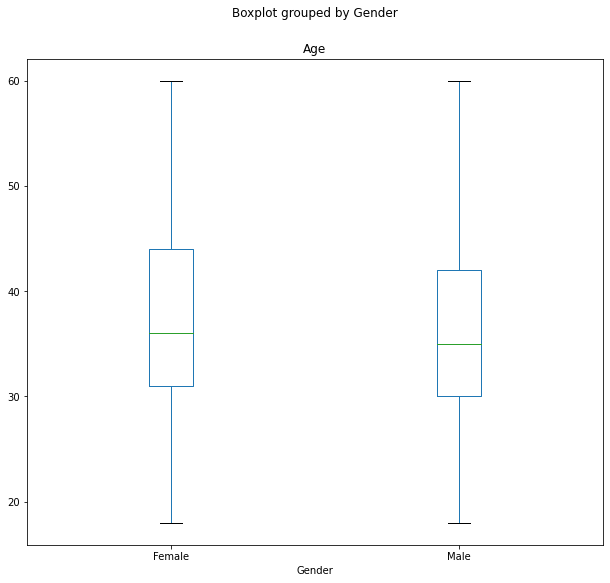

In [14]:
# Creating plot
df1.boxplot(column="Age", by="Gender", grid=False, figsize=(10, 9))

# Showing plot
plt.show()